## PART-A ( Concept Based)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics 

In [2]:
ages = np.array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46,
                 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56,
                 61, 52, 69, 64, 46, 54])

In [3]:
# Q1. Compute the mean, median, and mode
mean_age = np.mean(ages)
median_age = np.median(ages)
mode_result = stats.mode(ages)
mode_age = mode_result.mode[0] if mode_result.count == 1 else f"Multiple modes: {mode_result.mode}"
print(f" Mean: {mean_age}, Median: {median_age}, Mode: {mode_age}")

 Mean: 54.904761904761905, Median: 55.0, Mode: Multiple modes: [54]


C:\Users\HP\AppData\Local\Temp\ipykernel_9452\2898363921.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(ages)


In [4]:
# Q2. Compute the range, variance, and standard deviation
data_range = np.ptp(ages)
variance_age = np.var(ages)
std_dev_age = np.std(ages)
print(f" Range: {data_range}, Variance: {variance_age}, Standard Deviation: {std_dev_age}")


 Range: 27, Variance: 38.51473922902495, Standard Deviation: 6.2060244302633025


In [5]:
# Q3. Find the mean deviation
mean_deviation = np.mean(np.abs(ages - mean_age))
print(f"Mean Deviation: {mean_deviation}")

Mean Deviation: 4.814058956916099


In [6]:
# Q4. Calculate the Pearson coefficient of skewness
skewness = 3 * (mean_age - median_age) / std_dev_age
print(f"Skewness: {skewness}")


Skewness: -0.046038214790295746


In [7]:
# Q5. Count data values within two standard deviations of the mean
within_two_std_dev = ((ages >= mean_age - 2 * std_dev_age) & (ages <= mean_age + 2 * std_dev_age)).sum()
print(f" Data within Two Standard Deviations: {within_two_std_dev}")


 Data within Two Standard Deviations: 39


In [8]:
# Q6. Find quartiles and interquartile range (IQR)
q1, q2, q3 = np.percentile(ages, [25, 50, 75])
iqr = q3 - q1
print(f" Quartiles (Q1, Q2, Q3): {q1}, {q2}, {q3}, IQR: {iqr}")


 Quartiles (Q1, Q2, Q3): 51.0, 55.0, 57.75, IQR: 6.75


In [9]:
# Q7. Check for outliers
outliers = ((ages < q1 - 1.5 * iqr) | (ages > q3 + 1.5 * iqr))
print(f" Outliers: {outliers}")

 Outliers: [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False]


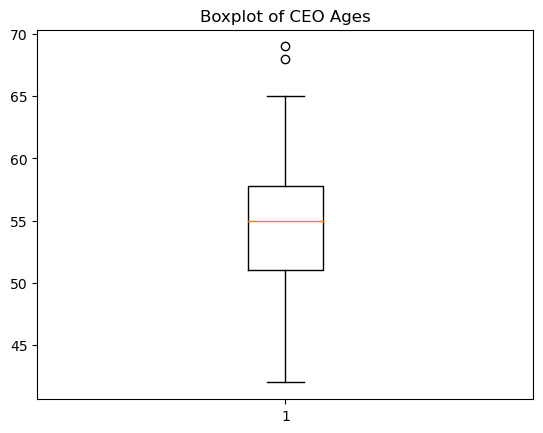

In [10]:
# Q8. Draw a boxplot
import matplotlib.pyplot as plt
plt.boxplot(ages)
plt.title('Boxplot of CEO Ages')
plt.show()


In [11]:
# Q9. Find percentile rank of datapoint 50
percentile_rank_50 = np.percentile(ages, 50, interpolation='nearest')
print(f"Percentile Rank of 50: {percentile_rank_50}")

Percentile Rank of 50: 55


C:\Users\HP\AppData\Local\Temp\ipykernel_9452\4285171318.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  percentile_rank_50 = np.percentile(ages, 50, interpolation='nearest')


In [12]:
# Q10. Probability that a person becoming a CEO is below 50
probability_below_50 = np.mean(ages < 50)
print(f" Probability below 50: {probability_below_50}")

 Probability below 50: 0.19047619047619047


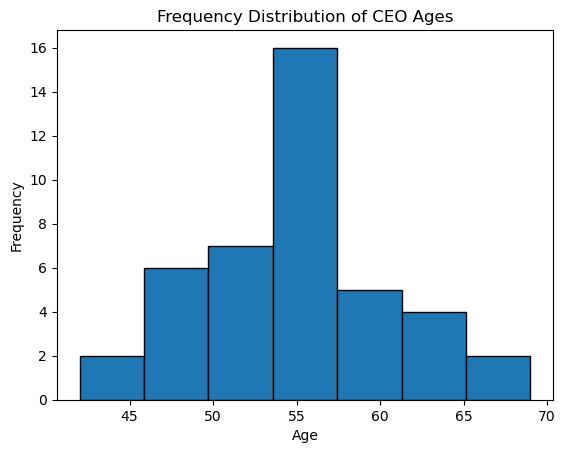

In [13]:
# Q11. Create a frequency distribution and visualize
plt.hist(ages, bins='auto', edgecolor='black')
plt.title('Frequency Distribution of CEO Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

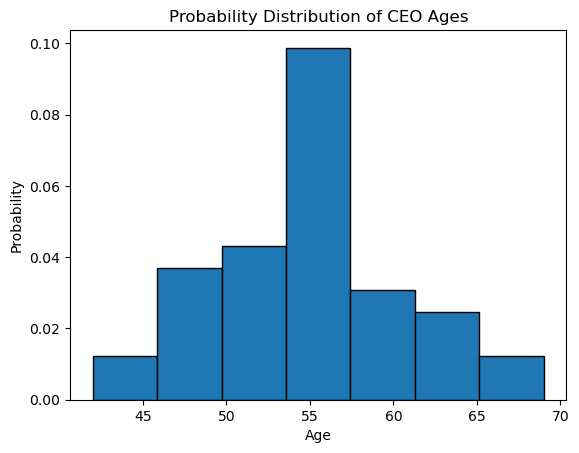

In [14]:
# Q12. Create a probability distribution and visualize
plt.hist(ages, bins='auto', density=True, edgecolor='black')
plt.title('Probability Distribution of CEO Ages')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

<Axes: ylabel='Density'>

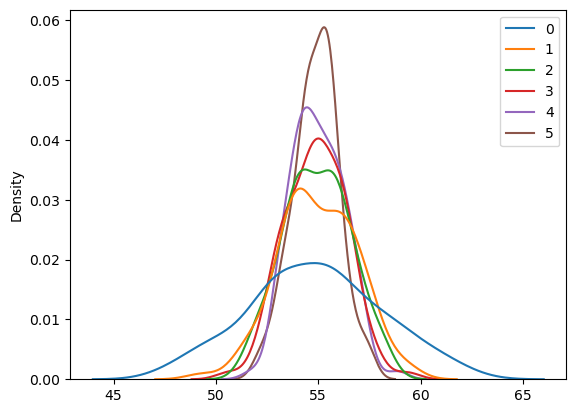

In [15]:
# Q13. Take random samples and create sampling distributions
sample_sizes = [5, 10, 15, 20, 25, 30]
sampling_distributions = []

for size in sample_sizes:
    means = [np.mean(np.random.choice(ages, size, replace=True)) for _ in range(100)]
    sampling_distributions.append(means)
sns.kdeplot(sampling_distributions)

In [16]:
# Q14. Binomial distribution probability
p_above_50 = np.mean(ages > 50)
prob_6_above_50 = stats.binom.pmf(6, 10, p_above_50)
print(f"Probability of exactly 6 above 50: {prob_6_above_50}")

Probability of exactly 6 above 50: 0.13201590604140495


In [17]:
# Q15. Normal approximation of binomial distribution
prob_75_above_50 = stats.norm.cdf(75, loc=300 * p_above_50, scale=np.sqrt(300 * p_above_50 * (1 - p_above_50)))
print(f" Probability of exactly 75 above 50: {prob_75_above_50}")

 Probability of exactly 75 above 50: 1.509026632813146e-96


In [18]:
# Q16. Confidence Interval
confidence_interval = stats.norm.interval(0.95, loc=mean_age, scale=std_dev_age/np.sqrt(len(ages)))
print(f"Confidence Interval: {confidence_interval}")


Confidence Interval: (53.02788008884848, 56.78164372067533)


In [19]:
# Q17. Minimum sample size for proportion estimation
desired_margin_of_error = 0.02
estimated_proportion = 0.25
minimum_sample_size_proportion = int(np.ceil((stats.norm.ppf(0.975)**2 * estimated_proportion * (1 - estimated_proportion)) / (desired_margin_of_error**2)))
print(f"Minimum Sample Size for Proportion: {minimum_sample_size_proportion}")

Minimum Sample Size for Proportion: 1801


In [20]:
# Q18. Minimum sample size for proportion estimation
desired_confidence_level = 0.90
desired_margin_of_error_proportion = 0.05
minimum_sample_size_proportion_90_conf = int(np.ceil((stats.norm.ppf((1 + desired_confidence_level) / 2)**2 * estimated_proportion * (1 - estimated_proportion)) / (desired_margin_of_error_proportion**2)))
print(f"Minimum Sample Size for Proportion (90% Confidence): {minimum_sample_size_proportion_90_conf}")

Minimum Sample Size for Proportion (90% Confidence): 203


In [21]:
# Q19. Hypothesis testing
observed_proportion = 10 / 30
expected_proportion = 0.25
alpha = 0.05
z_stat = (observed_proportion - expected_proportion) / np.sqrt(expected_proportion * (1 - expected_proportion) / 30)
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
print(f"Hypothesis Testing - p-value: {p_value}, Reject Null Hypothesis? {p_value < alpha}")

Hypothesis Testing - p-value: 0.29184054514378865, Reject Null Hypothesis? False


In [22]:
uk_ceo_ages = np.array([47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47])
usa_ceo_ages = np.array([47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32])


In [23]:
## a. What are your hypotheses?
#H0: mu_UK = mu_USA
#H1: mu_UK > mu_USA

In [24]:
## b. What significance level will you use?
alpha = 0.05

In [25]:
## c. What statistical test will you use?

## Since you are comparing the means of two independent samples and assuming the data is
## approximately normally distributed, you can use a two-sample t-test for the difference in means.

In [26]:
## d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
n_uk = len(uk_ceo_ages)
n_usa = len(usa_ceo_ages)
s_uk = 8.8
s_usa = 7.8
t_stat, p_value = stats.ttest_ind(uk_ceo_ages, usa_ceo_ages, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.0018742016808726
P-value: 0.31955176065671603


In [27]:
## e. What is your decision?

Compare the p-value to the significance level (alpha = 0.05), we fail to reject null hypothesis

In [28]:
## f. What can you conclude?

Since the p-value is greater than the chosen significance level of 0.05, there is not enough evidence to reject the null hypothesis. In practical terms, this suggests that there is not sufficient evidence to conclude that the average CEO age in the UK is significantly greater than the average CEO age in the USA based on the provided data.

In [29]:
## g. Do you feel that using the data given really answers the original question asked?

The data provided, along with the statistical test, indicates that there is not enough evidence to support the claim that the average CEO age in the UK is higher than in the USA. However, the data might not fully answer the question because there could be other factors not considered in this analysis.

In [30]:
## h. What other data might be used to answer the question?

To provide a more comprehensive answer to the question, additional data on factors such as the industries of the companies, cultural differences, and economic conditions in the UK and the USA could be considered. Analyzing the CEO ages within specific industry sectors or taking into account economic trends may offer a more nuanced understanding of the age differences between CEOs in the two countries.

# PART-B ( Dataset Based)

## Topic - Credit Card Fraud Detectio 

#### 1. Import the dataset and view the first 10 rows of it.

In [31]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2. Display shape/dimension of the dataset.

In [32]:
df.shape

(284807, 31)

#### 3. Check for the missing values.Display number of missing values per column.

In [8]:
 df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 4. Check the datatype, number of non-null values and name of each variablein the dataset.

In [33]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### 5. Check if there are any non-real characters in the dataset

In [34]:
non_real_characters =  df.applymap(lambda x: not isinstance(x, (int, float)))
non_real_characters.sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 6. Check the descriptive statistics of the dataset.

In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 7. Check the number of fraudulent transactions in the dataset and visualizeusing pie chart and bar plot.


Number of fraudulent transactions:
0    284315
1       492
Name: Class, dtype: int64


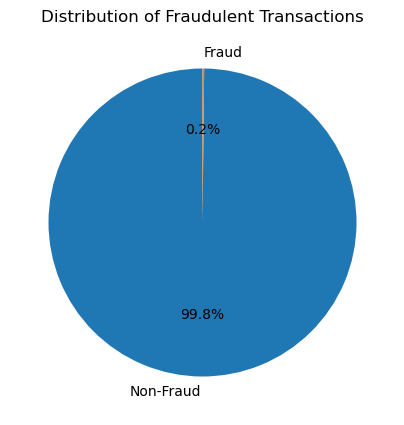

In [36]:
fraud_counts = df['Class'].value_counts()
print("Number of fraudulent transactions:")
print(fraud_counts)

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

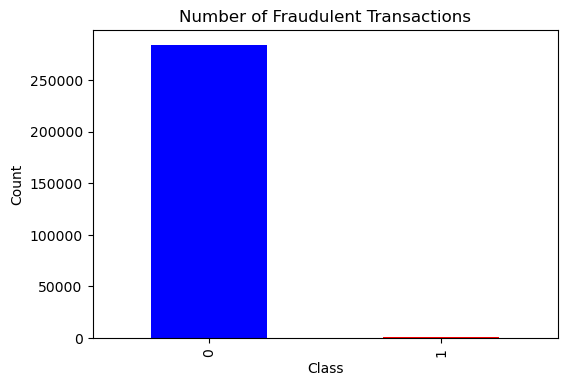

In [37]:
# Bar plot
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### 8. Check the maximum and minimum fraudulent amount

In [38]:
max_fraud_amount = df[df['Class'] == 1]['Amount'].max()
min_fraud_amount = df[df['Class'] == 1]['Amount'].min()
print("Maximum fraudulent amount:", max_fraud_amount)
print("Minimum fraudulent amount:", min_fraud_amount)

Maximum fraudulent amount: 2125.87
Minimum fraudulent amount: 0.0


#### 9. Check the number of transactions where the transaction amount is zero and consider as a fraud transaction.

In [39]:
zero_amount_fraud_count = df[df['Amount'] == 0]['Class'].sum()
print("Number of fraud transactions with zero amount:", zero_amount_fraud_count)

Number of fraud transactions with zero amount: 27


#### 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

In [40]:
skewness = df.skew()
normal_columns = skewness[abs(skewness) < 0.5].index.tolist()
non_normal_columns = skewness[abs(skewness) >= 0.5].index.tolist()

print("Normally distributed columns:", normal_columns)
print("Non-normally distributed columns:", non_normal_columns)

Normally distributed columns: ['Time', 'V11', 'V13', 'V15', 'V18', 'V19', 'V22', 'V25']
Non-normally distributed columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28', 'Amount', 'Class']


#### 11. List down columns that are highly skewed.

In [41]:
highly_skewed_columns = skewness[abs(skewness) > 1].index.tolist()
print("Highly skewed columns:", highly_skewed_columns)

Highly skewed columns: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount', 'Class']


#### 12. With the help of a standard scaler, normalize the respective column distribution.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[non_normal_columns] = scaler.fit_transform(df[non_normal_columns])

#### 13. List down columns that have high kurtosis.

In [43]:
high_kurtosis_columns = df.kurtosis()[abs(df.kurtosis()) > 3].index.tolist()
print("Columns with high kurtosis:", high_kurtosis_columns)

Columns with high kurtosis: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V25', 'V27', 'V28', 'Amount', 'Class']


#### 14. What is the distribution of Time and Amount columns in the dataset ?

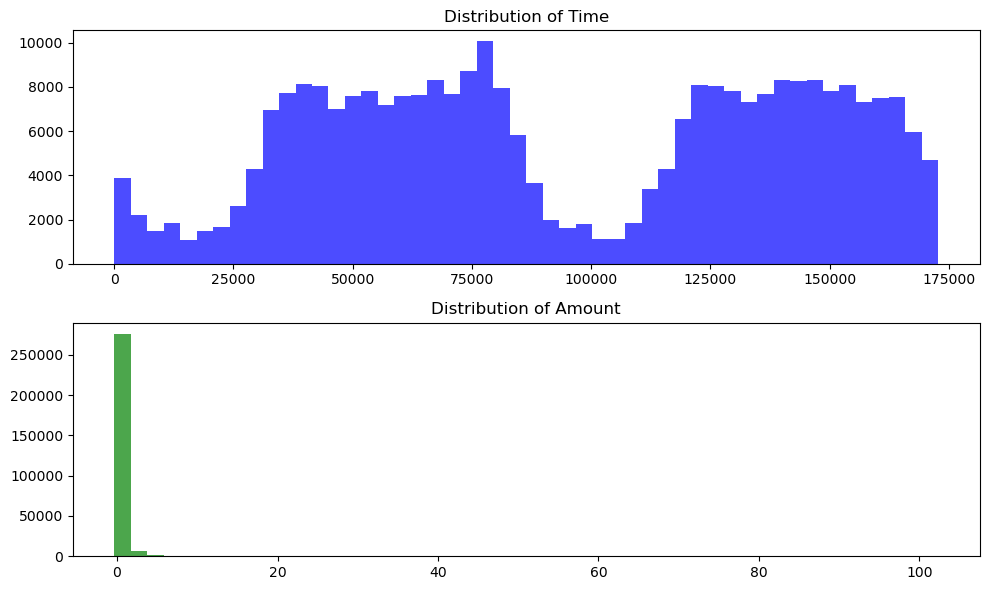

In [44]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(df['Time'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Time')

plt.subplot(2, 1, 2)
plt.hist(df['Amount'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

#### 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()


KeyboardInterrupt



#### 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

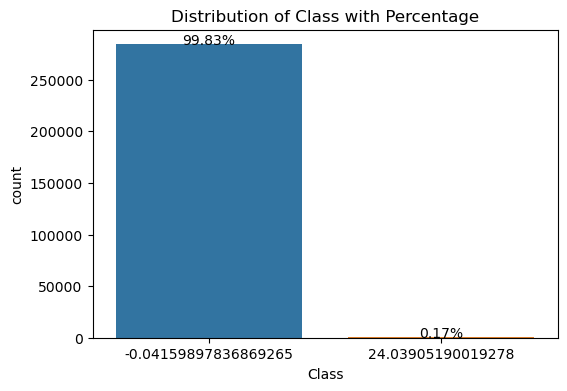

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
total = len(df['Class'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.2%}', ha="center")

plt.title('Distribution of Class with Percentage')
plt.show()

#### 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).


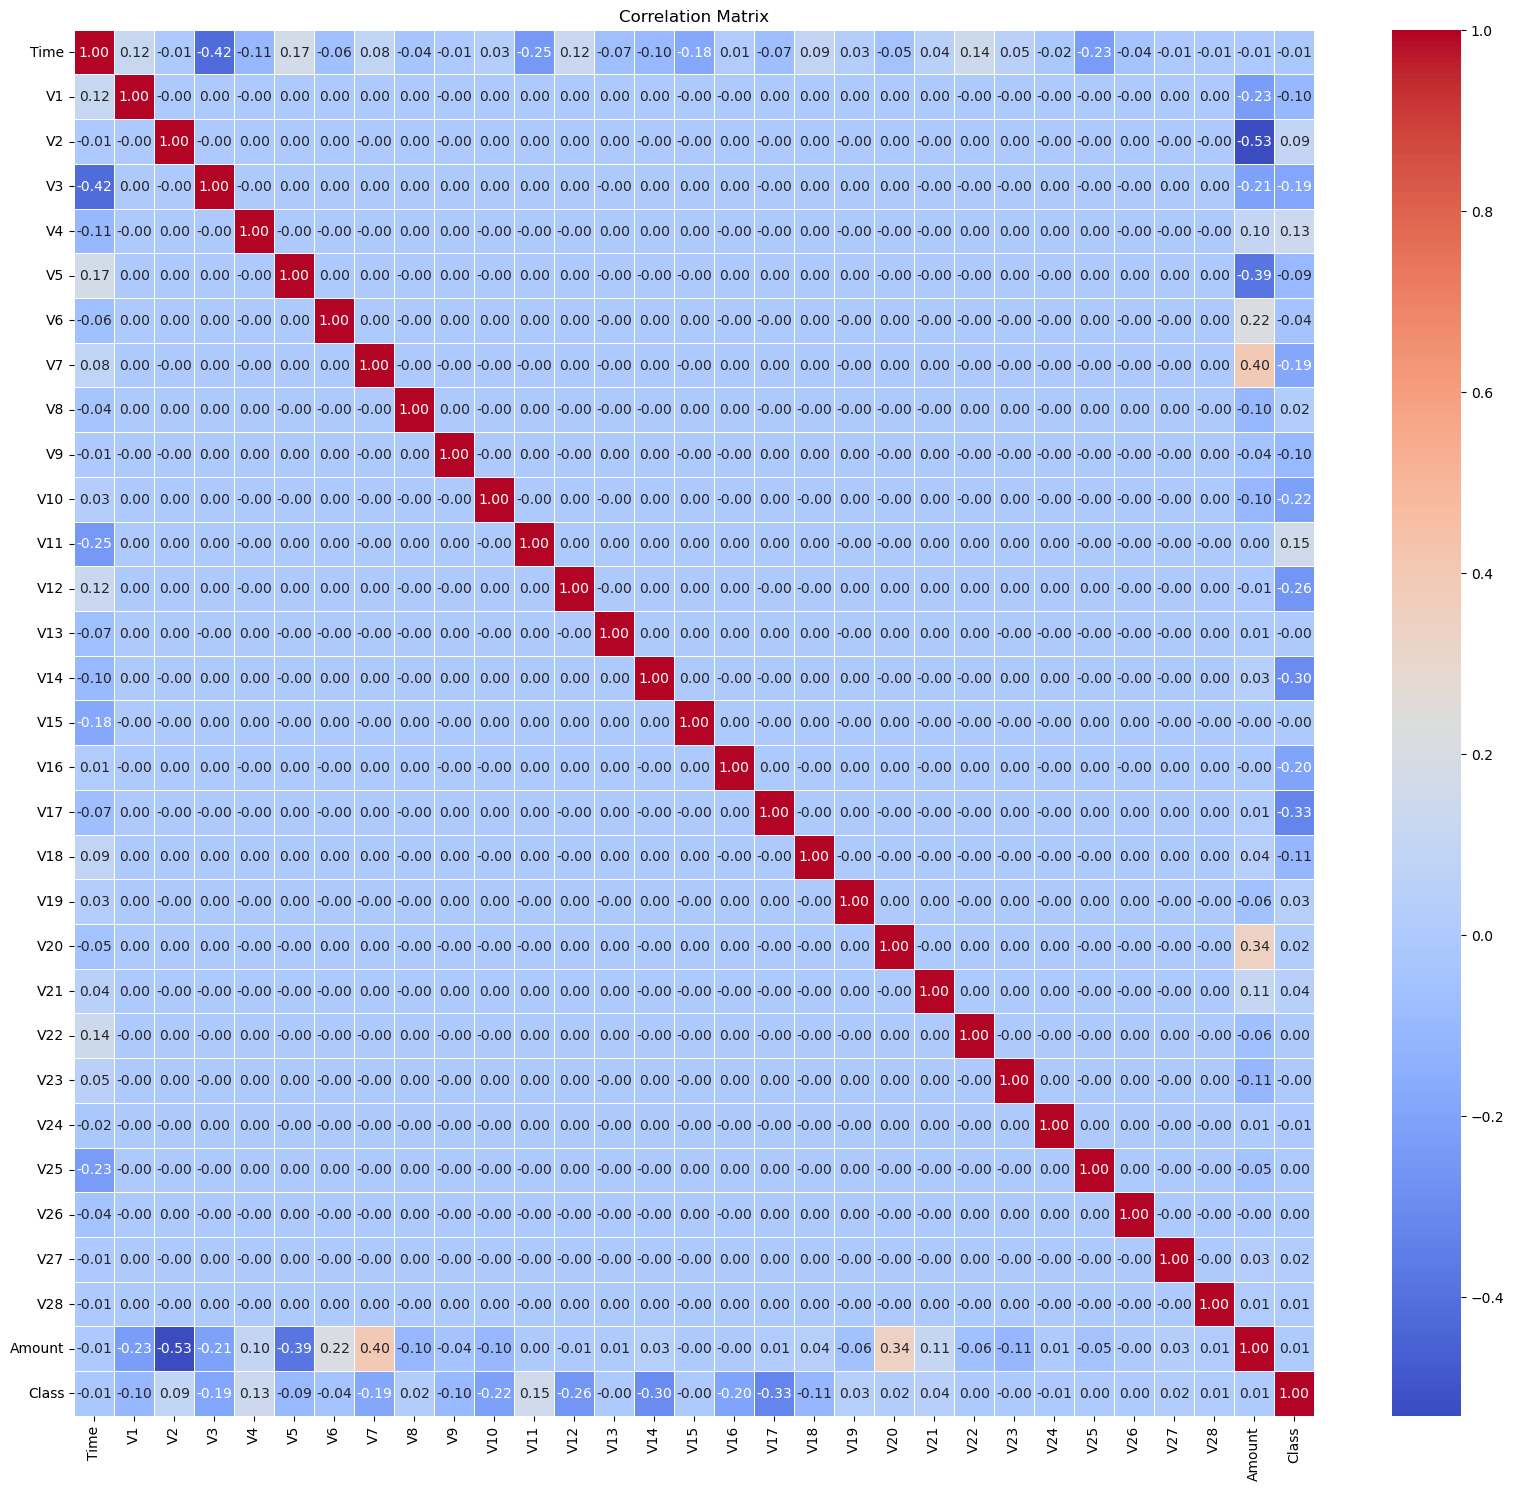

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions? 

In [27]:
## Null Hypothesis (H0): The mean amount for fraudulent transactions is equal to the mean amount for normal transactions.
## Alternative Hypothesis (H1): The mean amount for fraudulent transactions is higher than the mean amount for normal transactions. 


In [60]:
from scipy.stats import ttest_ind
normal_amount = df[df['Class'] == 0]['Amount']
fraud_amount = df[df['Class'] == 24]['Amount']
t_statistic, p_value = ttest_ind(normal_amount, fraud_amount, alternative='greater')
print("T-statistic:", t_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that fraudulent transactions have a higher mean amount.")
else:
    print("Fail to reject the null hypothesis.")


T-statistic: -3.005552313971408
P-value: 0.9986743896754041
Fail to reject the null hypothesis.


#### 19. Perform ANOVA test for Statistical feature selection

In [61]:
from scipy.stats import f_oneway
amount_by_class = [df[df['Class'] == cls]['Amount'] for cls in df['Class'].unique()]
f_statistic, p_value = f_oneway(*amount_by_class)
print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the means of 'Amount' vary among different classes.")
else:
    print("Fail to reject the null hypothesis.")


F-statistic: 9.033344712018893
P-value: 0.0026512206498171095
Reject the null hypothesis. There is evidence that the means of 'Amount' vary among different classes.


#### 20. Split the dataset randomly into train and test datasets. Use a train -testratio of 70:30 ratio.

In [62]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (199364, 30)
Shape of X_test: (85443, 30)
Shape of y_train: (199364,)
Shape of y_test: (85443,)


#### 21. These are just checkpoints. Please use your best analytical approach to build this report. You can mix match columns to create new ones which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. You can use the following as checklist pointers :

####  What is the shape and size of the dataset?


In [63]:
df.shape

(284807, 31)

####  Which columns are highly skewed?


In [64]:
skewed_columns = df.skew().sort_values(ascending=False)
print("Skewed Columns:")
print(skewed_columns[abs(skewed_columns) > 1])

Skewed Columns:
Class     23.997579
Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
V10        1.187141
V16       -1.100966
V27       -1.170209
V14       -1.995176
V20       -2.037155
V3        -2.240155
V12       -2.278401
V5        -2.425901
V1        -3.280667
V17       -3.844914
V2        -4.624866
V23       -5.875140
V8        -8.521944
dtype: float64


####  Which columns are highly Kurtosis driven?


In [65]:
kurtosis_columns = df.kurt().sort_values(ascending=False)
print("Kurtosis-Driven Columns:")
print(kurtosis_columns[abs(kurtosis_columns) > 1])

Kurtosis-Driven Columns:
V28       933.397502
Amount    845.092646
Class     573.887843
V23       440.088659
V7        405.607417
V20       271.016113
V27       244.989241
V8        220.586974
V21       207.287040
V5        206.904560
V2         95.773106
V17        94.799719
V6         42.642494
V1         32.486679
V10        31.988239
V3         26.619551
V14        23.879462
V12        20.241870
V16        10.419131
V25         4.290412
V9          3.731311
V22         2.832967
V4          2.635455
V18         2.578341
V19         1.724970
V11         1.633921
Time       -1.293530
dtype: float64


####  Which columns have Wrong data type?


In [66]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int32
dtype: object

####  What columns seem to have outliers based on min, max and percentile values,IQR range along with the standard deviation and mean absolute deviation?

In [67]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Columns with Outliers:")
print(outliers[outliers > 0])

Columns with Outliers:
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


####  What columns have missing values? (Check the Missing Values section in Pandas Profiling)


In [68]:
missing_values = df.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


####  What columns have high amount of zero and make sure that these zeroes are supposed to be there( for eg. Weight cannot be zero and any percentage of zero in column zero is erroneous)

In [69]:
zero_counts = (df == 0).sum()
print("Columns with High Zeros:")
print(zero_counts[zero_counts > 0])

Columns with High Zeros:
Time          2
Class    284315
dtype: int64


####  What columns have high variance and standard deviation?


In [70]:
variance_values = df.var().sort_values(ascending=False)
print("High Variance Columns:")
print(variance_values[variance_values > 1])

High Variance Columns:
Time      2.255124e+09
V11       1.041855e+00
V2        1.000004e+00
V20       1.000004e+00
V9        1.000004e+00
V23       1.000004e+00
V8        1.000004e+00
V16       1.000004e+00
V14       1.000004e+00
V21       1.000004e+00
V6        1.000004e+00
V10       1.000004e+00
V7        1.000004e+00
V3        1.000004e+00
V17       1.000004e+00
V1        1.000004e+00
V12       1.000004e+00
V4        1.000004e+00
V27       1.000004e+00
V28       1.000004e+00
V24       1.000004e+00
V5        1.000004e+00
V26       1.000004e+00
Amount    1.000004e+00
dtype: float64


####  Comment on the distribution of the continuous values (Real Number: ℝ≥0)


In [71]:
skewness = df.skew()
kurtosis = df.kurt()
skewed_columns = skewness[abs(skewness) > 1]
kurtosis_driven_columns = kurtosis[abs(kurtosis) > 1]

print("Skewed Columns:")
print(skewed_columns)

print("\nKurtosis-Driven Columns:")
print(kurtosis_driven_columns)

Skewed Columns:
V1        -3.280667
V2        -4.624866
V3        -2.240155
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V10        1.187141
V12       -2.278401
V14       -1.995176
V16       -1.100966
V17       -3.844914
V20       -2.037155
V21        3.592991
V23       -5.875140
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

Kurtosis-Driven Columns:
Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V14        23.879462
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V25         4.290412
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887

####  Do you see any alarming trends in the extreme values (minimum 5 and maximum 5)?


In [72]:
extreme_values = df.describe().loc[['min', 'max']]
print("Extreme Values:")
print(extreme_values)

Extreme Values:
         Time         V1         V2         V3         V4         V5  \
min       0.0 -28.798555 -44.035292 -31.871733  -4.013919 -82.408097   
max  172792.0   1.253351  13.357750   6.187993  11.918743  25.214135   

            V6         V7         V8         V9  ...        V21        V22  \
min -19.636058 -35.209396 -61.302524 -12.228015  ... -47.419067 -10.933144   
max  55.020149  97.478239  16.751534  14.194945  ...  37.034714  10.503090   

           V23       V24        V25       V26        V27         V28  \
min -71.754464 -4.683638 -10.295397 -5.401098 -55.906596  -46.746117   
max  36.076675  7.569684   7.519589  7.293975  78.319397  102.543421   

         Amount  Class  
min   -0.353229    0.0  
max  102.362243   24.0  

[2 rows x 31 columns]


####  How many Boolean columns are there in the data set and out of those howmany are imbalanced?


In [73]:
df.select_dtypes(include='bool').columns

Index([], dtype='object')

####  Check for duplicate records across all columns (Check Warning Section)


In [74]:
duplicate_records = df.duplicated()
print("Number of Duplicate Records:", duplicate_records.sum())

if duplicate_records.sum() > 0:
    duplicate_data = df[duplicate_records]
    print("\nDuplicate Records:")
    print(duplicate_data)

Number of Duplicate Records: 1081

Duplicate Records:
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.270544  0.529212  0.888538  0.102733  0.300098  0.075227   
35          26.0 -0.273339  0.523990  0.891063  0.104230  0.314205  0.065289   
113         74.0  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
114         74.0  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
115         74.0  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  0.976442 -0.275685 -1.154593  0.320881  1.513595  3.122507   
283483  171627.0 -0.747632  0.828507  0.538164 -0.424674 -0.499270 -0.365658   
283485  171627.0 -0.744363  0.834614  0.535211 -0.426424 -0.515766 -0.354037   
284191  172233.0 -1.362100  1.913943 -2.213342  0.711822 -0.273427 -0.082363   
284193  172233.0 -1.374203  1.891332 -2.202408  0.718301 -0.212350

####  Is there any imbalance in the categorical columns? (for example Gender Male and Female in which Male is 95% and Female is just 5%- How many columns are categorical?)


In [75]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    class_distribution = df[col].value_counts(normalize=True)
    print(f"\nClass distribution for {col}:")
    print(class_distribution)

    imbalance_threshold = 0.95
    imbalanced_classes = class_distribution[class_distribution > imbalance_threshold]
    
    if not imbalanced_classes.empty:
        print(f"\nWarning: High class imbalance in {col} column.")
        print(f"Imbalanced classes: {imbalanced_classes}")


####  Are those categories in sync with the domain categories?


#### Check if all the categories are unique and they represent distinct information Based on the above questions and your observations, chart out a plan for DataPreprocessing and feature engineering

In [77]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

for col in categorical_columns:
    unique_categories_count = df[col].nunique()
    total_entries = len(df[col])
    
    if unique_categories_count == total_entries:
        print(f"All categories are unique in {col} column.")
    else:
        print(f"Warning: Not all categories are unique in {col} column. Unique categories count: {unique_categories_count}, Total entries: {total_entries}")
